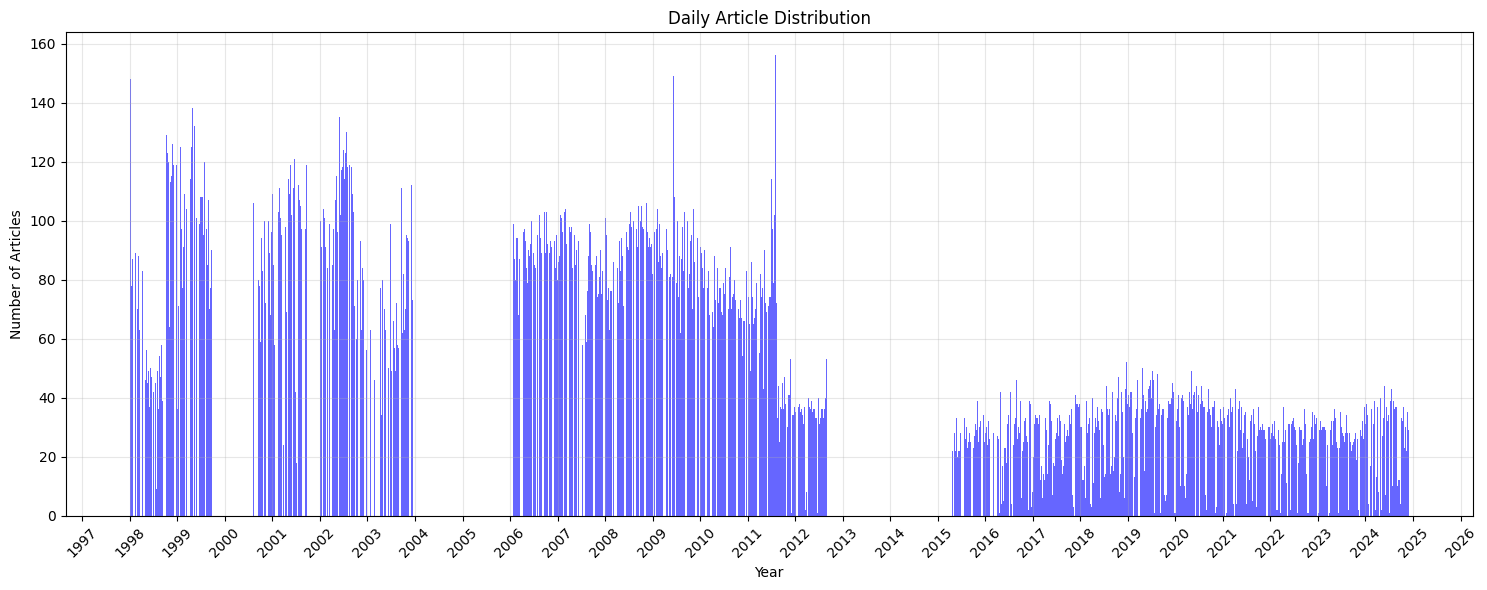

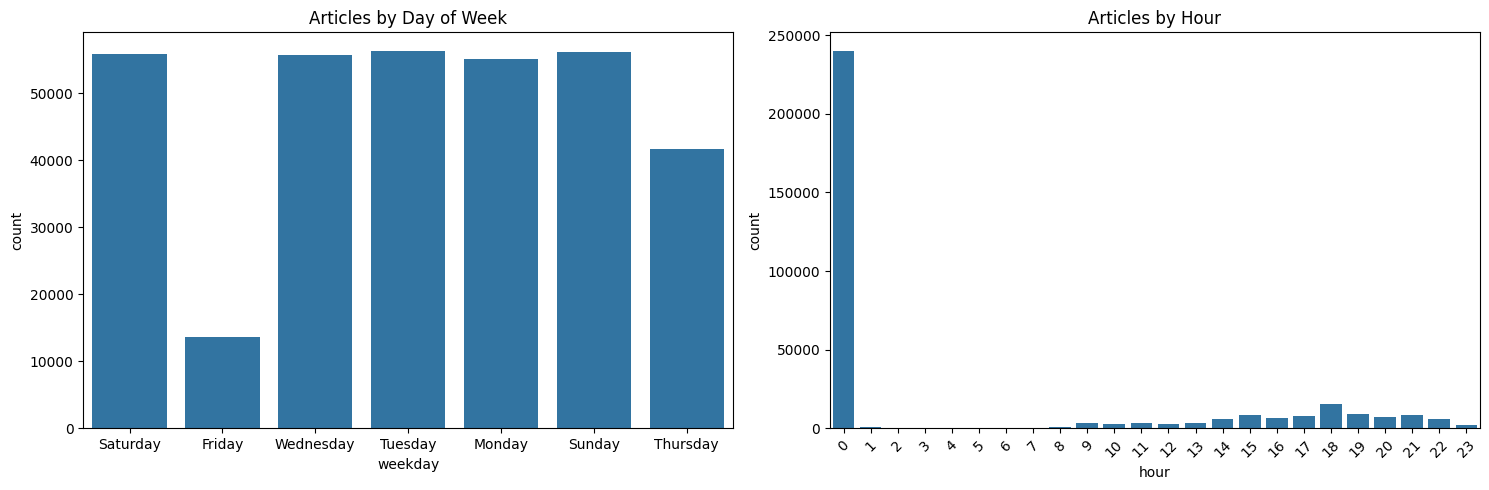

In [1]:
"""Time-based analysis of article publication patterns"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime

# Load data
df = pd.read_csv("../data/processed/articles.csv", sep=';')

# Convert dates
df['date_for_analysis'] = pd.to_datetime(df['published_date'], errors='coerce')
df['weekday'] = df['date_for_analysis'].dt.day_name()
df['hour'] = df['date_for_analysis'].dt.hour

# Daily distribution
def plot_daily_distribution():
    df_daily = df.groupby(pd.Grouper(key='date_for_analysis', freq='D')).size()
    
    fig, ax = plt.subplots(figsize=(15, 6))
    ax.bar(df_daily.index, df_daily.values, width=1, color='blue', alpha=0.6)
    
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xticks(rotation=45)
    
    plt.title('Daily Article Distribution')
    plt.xlabel('Year')
    plt.ylabel('Number of Articles')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

plot_daily_distribution()

# Publication patterns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Weekly pattern
sns.countplot(data=df, x='weekday', ax=ax1)
ax1.set_title('Articles by Day of Week')
plt.xticks(rotation=45)

# Hourly pattern
sns.countplot(data=df, x='hour', ax=ax2)
ax2.set_title('Articles by Hour')

plt.tight_layout()
plt.show()